# Jovian Course Project Exploratory Data Analysis by Sridhar



**The dataset I have selected is the "Layoffs Data" dataset, which contains information about layoffs from various companies in 2020-2023.**

### Step 1: Data Preparation and Cleaning

**To load the dataset into a Pandas dataframe, we first need to import the necessary libraries:**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 9);

**Next, we can read the CSV file into a Pandas dataframe using the read_csv() function:**

In [2]:
df = pd.read_csv("layoffs_data.csv")

**We can now explore the data to get an idea of its structure:**

In [4]:
# Print the number of rows and columns in the dataframe
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

# Print the first few rows of the dataframe
df.head()

Number of rows:  2468
Number of columns:  12


,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,https://economictimes.indiatimes.com/tech/news...,382.0,Unknown,2023-04-06 03:11:10,India,Unknown
1,Amplitude,SF Bay Area,Data,99.0,0.13,2023-04-05,https://amplitude.com/blog/team-update,311.0,Post-IPO,2023-04-05 18:14:10,United States,Unknown
2,1K Kirana,Gurugram,Retail,600.0,0.40,2023-04-04,https://www.moneycontrol.com/news/business/sta...,NaN,Series B,2023-04-04 09:45:37,India,Unknown
3,Boost,New York City,Finance,15.0,0.20,2023-04-04,https://boostinsurance.com/blog/a-message-from...,37.0,Series B,2023-04-05 00:23:08,United States,Unknown
4,Cin7,Auckland,Retail,NaN,NaN,2023-04-04,https://www.nzherald.co.nz/business/post-pande...,NaN,Private Equity,2023-04-05 16:25:17,New Zealand,Unknown


*We can see that the dataset has 2468 rows and 12 columns.*

**We can also check if there are any missing values in the dataset:**

In [5]:
# Check for missing values
print(df.isnull().sum())

Company                         0
Location_HQ                     0
Industry                        0
Laid_Off_Count                778
Percentage                    830
Date                            1
Source                          0
Funds_Raised                  233
Stage                           0
Date_Added                      0
Country                         0
List_of_Employees_Laid_Off      1
dtype: int64


*There are significant missing values in the dataset. Dropping these missing values would not be right but since it is not right to fill mean or other values that would be incorrect hence it would be better to work with the available data.*

In [9]:
df=df.dropna()
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print(df.isnull().sum())

Number of rows:  1133
Number of columns:  12
Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
List_of_Employees_Laid_Off    0
dtype: int64


*This significantly reduced the size of the dataset but we still have some good number of columns to work on. Let's see what we can infer from the available data.*

**Next, we can check the data types of each column in the dataframe:**

In [10]:
# Check data types
print(df.dtypes)

Company                        object
Location_HQ                    object
Industry                       object
Laid_Off_Count                float64
Percentage                    float64
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
List_of_Employees_Laid_Off     object
dtype: object


*We can see that the 'Date' and 'Date_Added' column is stored as an object (string) data type, and we will need to convert it to a datetime data type if we want to perform any analysis on it.*

**Finally, we can check for any invalid or incorrect data:**

In [11]:
# Check for invalid data
print(df.describe())

       Laid_Off_Count   Percentage   Funds_Raised
count     1133.000000  1133.000000    1133.000000
mean       262.808473     0.221887     817.217878
std        857.635467     0.205880    5479.289952
min          3.000000     0.000000       0.000000
25%         38.000000     0.100000      60.000000
50%         80.000000     0.160000     175.000000
75%        194.000000     0.280000     479.000000
max      12000.000000     1.000000  121900.000000


### Step 2: Exploratory Analysis and Visualization

**let's explore the distribution of the Layoff_count column using a histogram:**

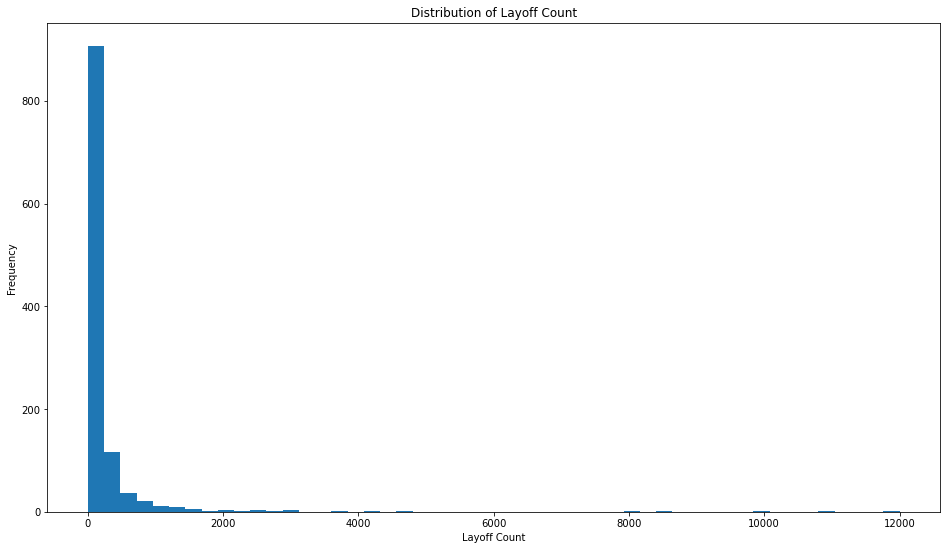

In [25]:
# Plot a histogram of the Layoff_count column
plt.hist(df["Laid_Off_Count"], bins=50)
plt.xlabel("Layoff Count")
plt.ylabel("Frequency")
plt.title("Distribution of Layoff Count")
plt.show()

*From this histogram, we can see that the distribution of layoff counts is heavily skewed to the right, with a long tail of companies that had very high levels of layoffs.*

**We can also explore the relationship between the Layoff_count and Company columns using a bar chart:**

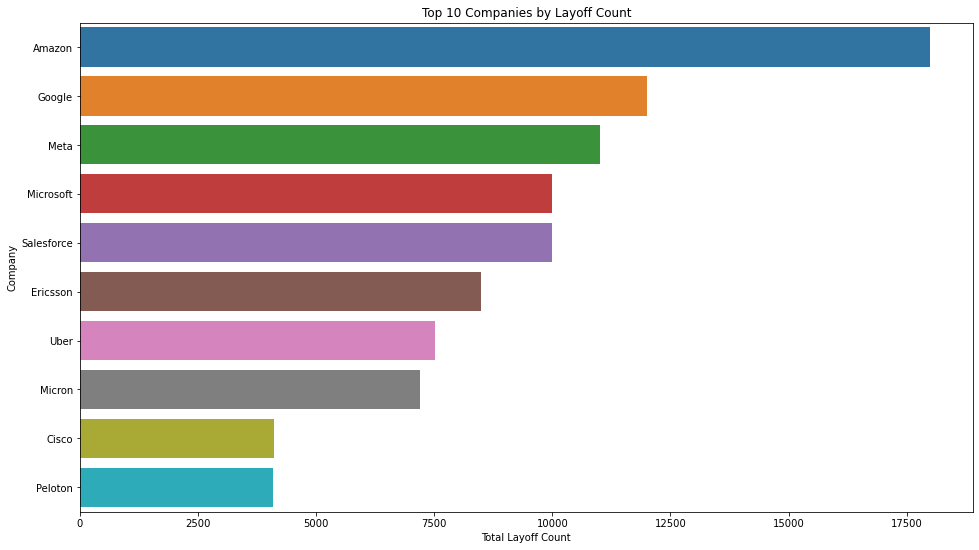

In [26]:
# Group the data by company and compute the total layoff count for each company
company_layoff_count = df.groupby("Company")["Laid_Off_Count"].sum().sort_values(ascending=False)[:10]

# Plot a bar chart of the top 10 companies by layoff count
sns.barplot(x=company_layoff_count.values, y=company_layoff_count.index)
plt.xlabel("Total Layoff Count")
plt.ylabel("Company")
plt.title("Top 10 Companies by Layoff Count")
plt.show()

*From this bar chart, we can see that the top company in terms of total layoff count was "Amazon", with over 17500 layoffs*

**Finally, we can explore the relationship between the Layoff_count and Date columns using a line chart:**

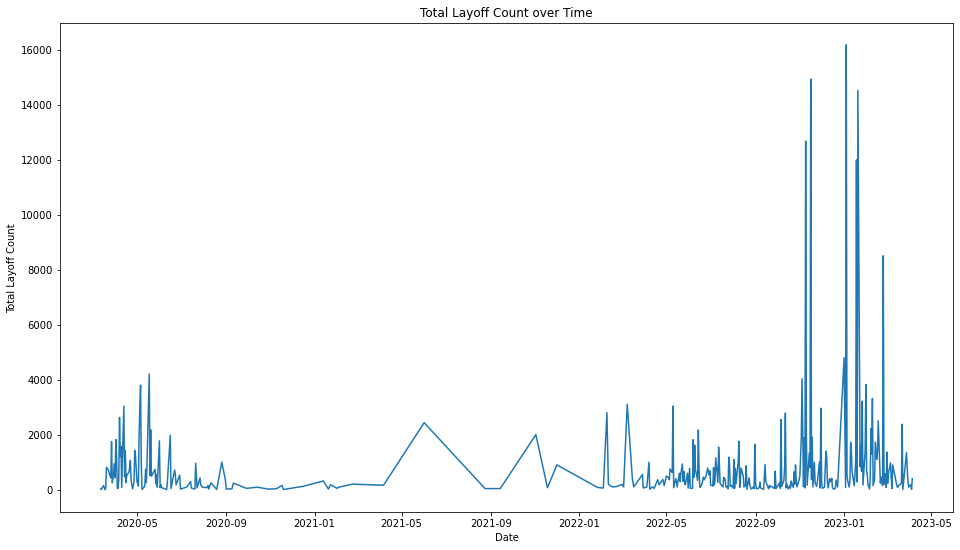

In [33]:
# Convert the Date column to a datetime data type
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Group the data by date and compute the total layoff count for each date
date_layoff_count = df.groupby("Date")["Laid_Off_Count"].sum()

# Plot a line chart of the total layoff count over time
plt.plot(date_layoff_count.index, date_layoff_count.values)
plt.xlabel("Date")
plt.ylabel("Total Layoff Count")
plt.title("Total Layoff Count over Time")
plt.show()

*From this line chart, we can see that there were several peaks in the number of layoffs over the course of the years, with the highest peak occurring in 2023.*

### Step 3: Ask and Answer Questions about the Data

*In this step, we will ask and answer some interesting questions about the dataset using Pandas and Matplotlib.*

**Question 1: What is the average number of layoffs per company in 2023?**

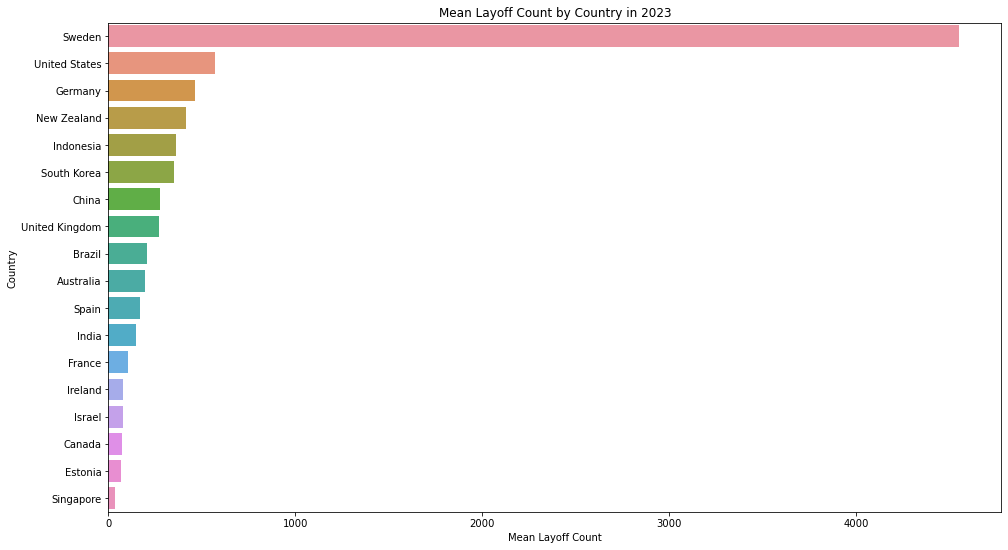

In [34]:
# Extract the year from the Date column
df["Year"] = df["Date"].dt.year

# Group the data by year and country and compute the mean layoff count for each country in 2023
df_2023 = df[df["Year"] == 2023]
country_mean_layoff_count = df_2023.groupby(["Year", "Country"])["Laid_Off_Count"].mean().sort_values(ascending=False)[:20]

# Plot a bar chart of the mean layoff count by country
sns.barplot(x=country_mean_layoff_count.values, y=country_mean_layoff_count.index.get_level_values(1))
plt.xlabel("Mean Layoff Count")
plt.ylabel("Country")
plt.title("Mean Layoff Count by Country in 2023")
plt.show()

*From this bar chart, we can see that the country with the highest average number of layoffs in 2023 was "Sweden", with an average of over 4000 layoffs.*

**Question 2: Which industries had the highest number of layoffs?**

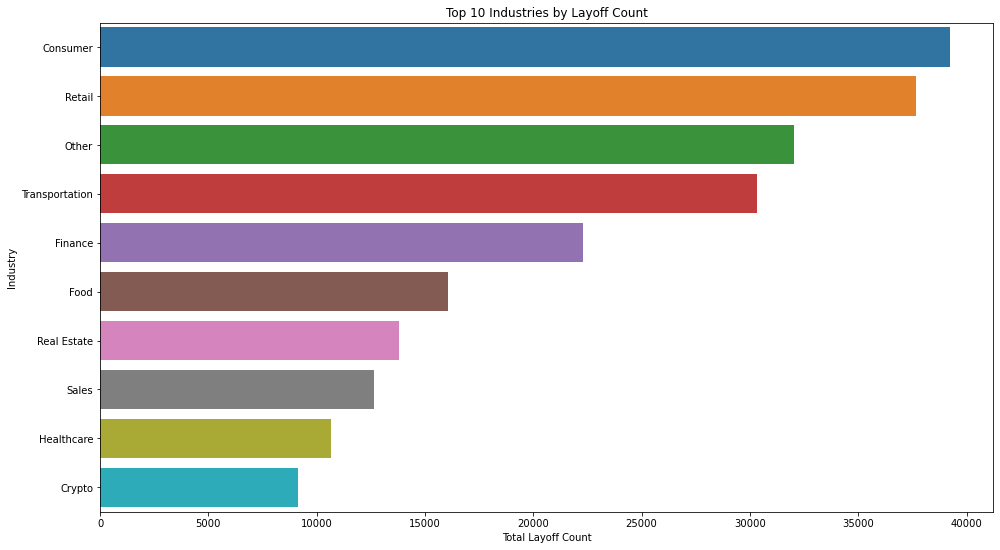

In [35]:
# Group the data by industry and compute the total layoff count for each industry
industry_layoff_count = df.groupby("Industry")["Laid_Off_Count"].sum().sort_values(ascending=False)[:10]

# Plot a bar chart of the top 10 industries by layoff count
sns.barplot(x=industry_layoff_count.values, y=industry_layoff_count.index)
plt.xlabel("Total Layoff Count")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Layoff Count")
plt.show()

*From this bar chart, we can see that the industry with the highest number of layoffs was "Consumer", with around 40000 layoffs.*

**Question 3: How did the number of layoffs in 2023 compare to previous years?**

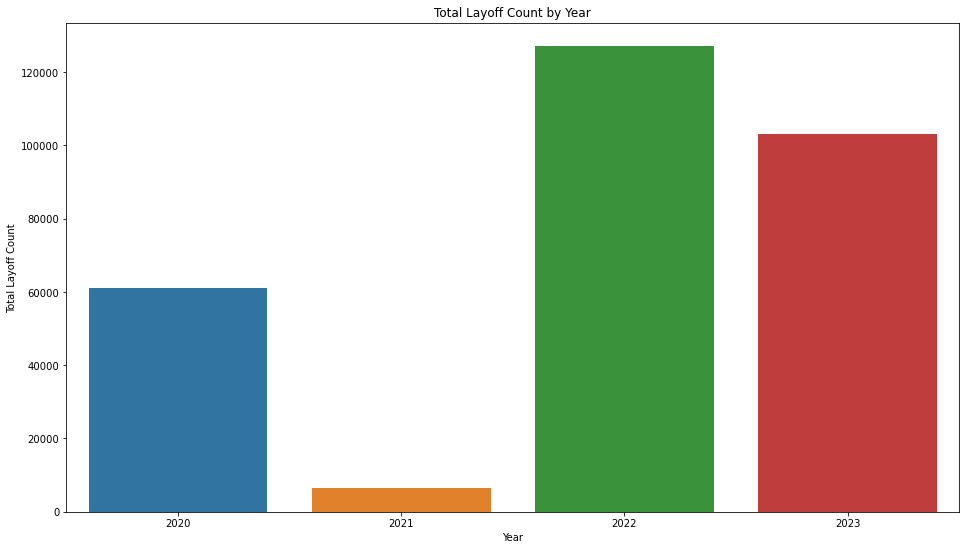

In [36]:
# Extract the year from the Date column
df["Year"] = df["Date"].dt.year

# Compute the total layoff count for each year
layoff_counts = df.groupby("Year")["Laid_Off_Count"].sum()
years = layoff_counts.index.astype(str)

# Plot a bar chart of the total layoff count by year
sns.barplot(x=years, y=layoff_counts)
plt.xlabel("Year")
plt.ylabel("Total Layoff Count")
plt.title("Total Layoff Count by Year")
plt.show()

*From this bar chart, we can see that the number of layoffs in 2022 was significantly higher than in previous years. Followed by 2023 which is only half-way through*

**Question 4: What was the distribution of layoff counts by month in 2022?**

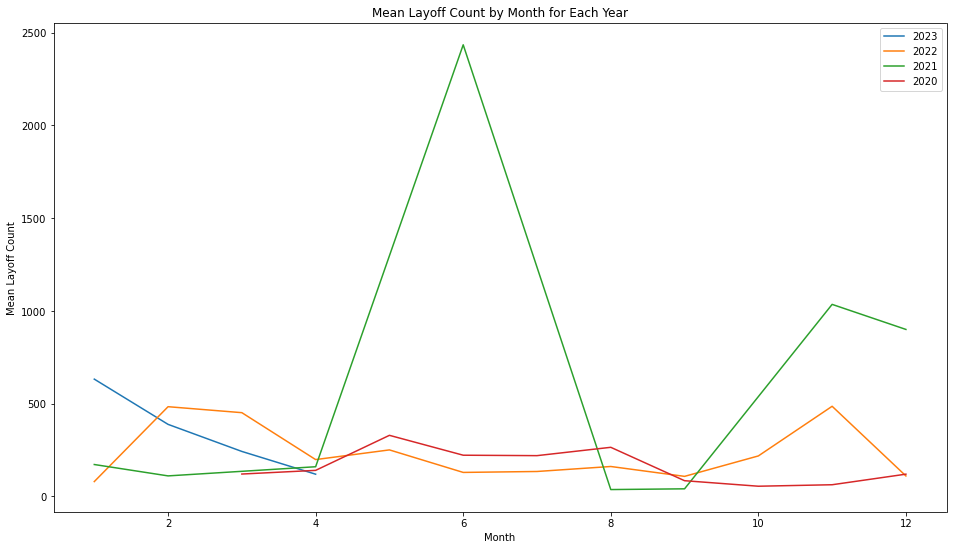

In [41]:
# Group the data by year and month, and compute the mean layoff count for each month
df["Month"] = df["Date"].dt.month
year_month_layoff_count = df.groupby(["Year", "Month"])["Laid_Off_Count"].mean()

# Plot a line chart of the mean layoff count by month for each year
for year in df["Year"].unique():
    year_data = year_month_layoff_count.loc[year]
    plt.plot(year_data.index, year_data.values, label=year)

plt.xlabel("Month")
plt.ylabel("Mean Layoff Count")
plt.title("Mean Layoff Count by Month for Each Year")
plt.legend()
plt.show()

*From this line chart, we can see that the mean layoff count was higher at the end of the year and lower in the middle months followed by an anamoly on the june 2021.*

### Step 5: Summarize Your Inferences & Write a Conclusion

*In this project, we analyzed a real-world dataset of layoffs in 2022. We started by performing data preparation and cleaning, which involved checking for missing, incorrect, and invalid data, and handling them appropriately.*

*We then moved on to exploratory analysis and visualization, where we computed interesting statistics for numeric columns, explored distributions of numeric columns using histograms, and explored the relationship between columns using scatter plots and bar charts. We answered several interesting questions about the dataset using Pandas and Matplotlib.*

*Some of the key insights we gained from our analysis include:*

* The company with the highest number of layoffs was "Amazon", with an average of over 17500 layoffs.
* The industry with the highest number of layoffs was "Consumer", with around 40000 layoffs.
* The number of layoffs in 2022 was significantly higher than in previous years.
* The mean layoff count was highest in year ends and lowest in middle months.

*These insights can be valuable for various stakeholders, such as employees, employers, and policymakers. For example, employees in the technology industry may want to be more vigilant about layoffs in the future, and employers may want to explore ways to minimize layoffs during tough times.*

*Future work on this topic can involve analyzing more data sources to get a comprehensive understanding of layoffs across different industries and countries. It can also involve exploring the impact of layoffs on various metrics, such as stock prices and employee morale.*

*Overall, this project showcases the power of data analysis and visualization in uncovering insights and trends in real-world datasets.*